In [2]:
from datasets import load_dataset

ds = load_dataset("bigcode/the-stack-dedup", data_dir="data/python", split="train")

/home/daniel/miniconda3/envs/eval/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Resolving data files: 100%|██████████| 144/144 [00:02<00:00, 51.38it/s]


In [4]:
import pandas as pd
from transformers import AutoTokenizer

checkpoint = "bigcode/starcoder"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

n_samples = 50000
n_token_max = 500
n_token_min = 50

samples = []

for sample in ds:
    tokens = tokenizer.encode(sample["content"])
    if len(tokens) < n_token_max and len(tokens) > n_token_min:
        samples.append({
            "hexsha": sample["hexsha"],
            "size": sample["size"],
            "content": sample["content"]
        })
    if len(samples) == n_samples:
        break
    elif (len(samples) % 1000) == 0:
        print("Samples added: " + str(len(samples)))

df = pd.DataFrame(samples)
df["prediction_50"] = None
df["prefix_50"] = None
df["bleu_50"] = None
df.to_csv("samples.csv", index=False, )

Samples added: 0
Samples added: 1000
Samples added: 2000
Samples added: 2000
Samples added: 2000
Samples added: 2000
Samples added: 2000
Samples added: 2000
Samples added: 2000
Samples added: 2000
Samples added: 2000
Samples added: 3000
Samples added: 4000
Samples added: 4000
Samples added: 4000
Samples added: 5000
Samples added: 5000
Samples added: 6000
Samples added: 6000
Samples added: 6000
Samples added: 6000
Samples added: 6000
Samples added: 6000
Samples added: 7000
Samples added: 7000
Samples added: 7000
Samples added: 7000
Samples added: 8000
Samples added: 8000
Samples added: 9000
Samples added: 9000
Samples added: 9000
Samples added: 9000
Samples added: 9000
Samples added: 9000
Samples added: 10000
Samples added: 10000
Samples added: 10000
Samples added: 10000
Samples added: 11000
Samples added: 11000
Samples added: 12000
Samples added: 13000
Samples added: 13000
Samples added: 13000
Samples added: 13000
Samples added: 14000
Samples added: 14000
Samples added: 14000
Samples a

In [5]:
print("hello")

hello


In [8]:
import pandas as pd

df = pd.read_csv("samples.csv")

In [10]:
block_df = df.loc[~df.prediction_50.isna()]

<Axes: >

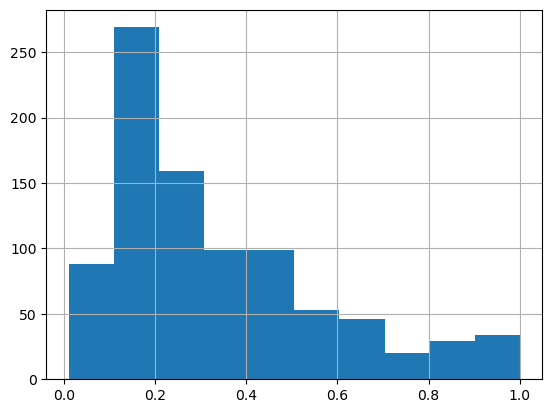

In [12]:
block_df.bleu_50.hist()